# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [50]:
import pandas as pd
import numpy as np
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[-3:]
# reverse the list
b.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a_sq = [i**2 for i in a]

In [25]:
# create a numpy array from this list
b = np.array(a)

In [26]:
# find the mean of b
b.mean()

3.5

In [38]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)

In [39]:
# change b from a length-6 list to a 2x3 matrix
np.reshape(b, (2, 3))


array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
# find the mean value of each row
print(b[0].mean())
print(b[1].mean())

2.0
5.0


In [47]:
# find the mean value of each column
print(b[:,0].mean())
print(b[:,1].mean())
print(b[:,2].mean())

2.5
3.5
4.5


In [48]:
# find the third column of b
b[:,2]

array([3, 6])

In [62]:
# load in the "starbucks_clean.csv" dataset
df = pd.read_csv("../data/starbucks.csv")
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,NaN,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,NaN,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,NaN,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,NaN,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,NaN,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,NaN,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [82]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df["Beverage"].unique()
bev = df.groupby("Beverage")
bev
bev["Calories"].mean()

Beverage
Banana Chocolate Smoothie                              290.000000
Brewed Coffee                                            4.250000
Caffè Americano                                         13.750000
Caffè Latte                                            139.166667
Caffè Mocha (Without Whipped Cream)                    210.000000
Cappuccino                                              90.000000
Caramel                                                150.000000
Caramel (Without Whipped Cream)                        268.888889
Caramel Apple Spice (Without Whipped Cream)            247.500000
Caramel Macchiato                                      184.166667
Coffee                                                 210.000000
Espresso                                                 7.500000
Hot Chocolate (Without Whipped Cream)                  236.666667
Iced Brewed Coffee (With Classic Syrup)                 93.333333
Iced Brewed Coffee (With Milk & Classic Syrup)         122.222222
J

In [95]:
# how many different categories of beverages are there?
cat = np.array(df["Beverage_category"].unique())
cat.size

9

In [107]:
# what is the average # calories for each beverage category?
cat = df.groupby("Beverage_category")
cat["Calories"].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [117]:
# what beverage preparation includes the most sugar on average?
prep = df.groupby("Beverage_prep")
prep["Sugars (g)"].mean().max()
print("Whole Milk")

Whole Milk


In [124]:
# what is the average % daily value calcium content for each beverage?
df["Calcium (% DV)"] = df["Calcium (% DV)"].map(lambda x: x.rstrip('%'))
df["Calcium (% DV)"] = df["Calcium (% DV)"].astype(int)
bev["Calcium (% DV)"].mean()

Beverage
Banana Chocolate Smoothie                              20.000000
Brewed Coffee                                           0.500000
Caffè Americano                                         1.500000
Caffè Latte                                            35.000000
Caffè Mocha (Without Whipped Cream)                    30.000000
Cappuccino                                             22.500000
Caramel                                                11.000000
Caramel (Without Whipped Cream)                        12.000000
Caramel Apple Spice (Without Whipped Cream)             0.000000
Caramel Macchiato                                      28.333333
Coffee                                                 12.333333
Espresso                                                0.000000
Hot Chocolate (Without Whipped Cream)                  35.000000
Iced Brewed Coffee (With Classic Syrup)                 0.000000
Iced Brewed Coffee (With Milk & Classic Syrup)          8.000000
Java Chip       

In [ ]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay


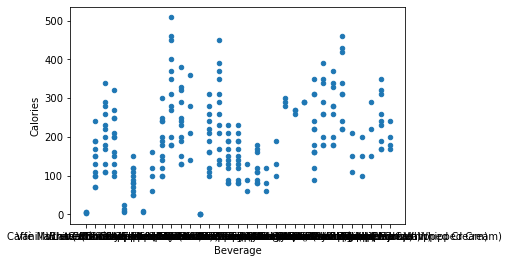

In [126]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df.plot.scatter(x="Beverage", y="Calories")

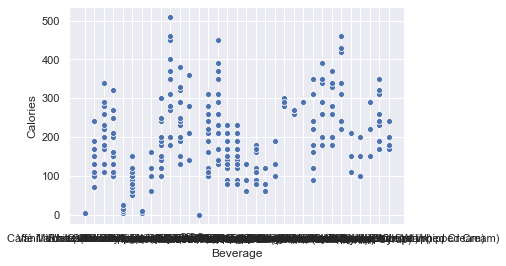

In [128]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()  # sets settings

sns.scatterplot(data=df, x="Beverage", y="Calories")

#density plot ? 

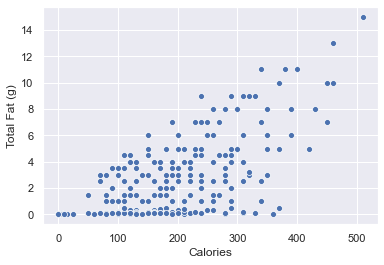

In [129]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x="Calories", y="Total Fat (g)")

In [146]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.
xy_cal = prep["Calories"].mean()
print(xy_cal)
#sns.barplot(df, x = prep, y = prep["Calories"].mean())
# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.


Beverage_prep
2% Milk               218.000000
Doppio                 10.000000
Grande                 85.714286
Grande Nonfat Milk    209.615385
Short                  37.000000
Short Nonfat Milk      99.166667
Solo                    5.000000
Soymilk               207.272727
Tall                   63.428571
Tall Nonfat Milk      147.826087
Venti                 118.571429
Venti Nonfat Milk     260.000000
Whole Milk            283.750000
Name: Calories, dtype: float64
